In [39]:
from IPython.display import Image

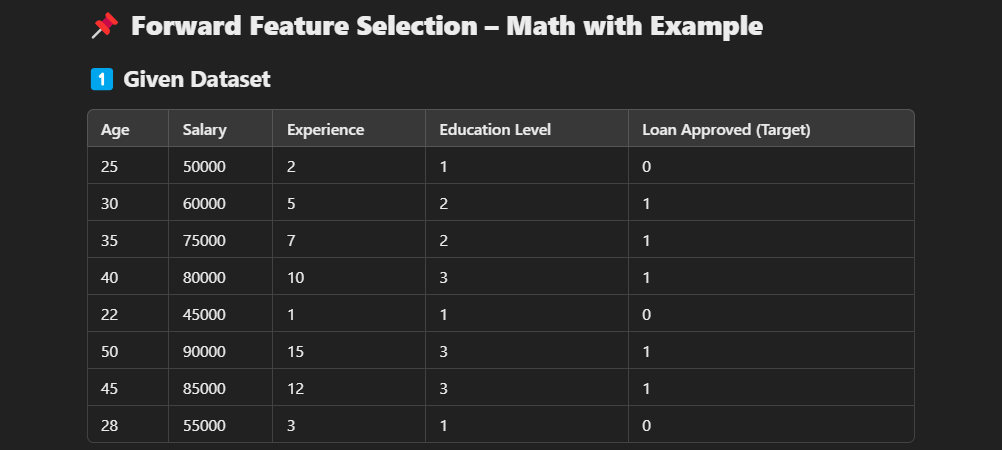

In [40]:
Image("image_1.png")

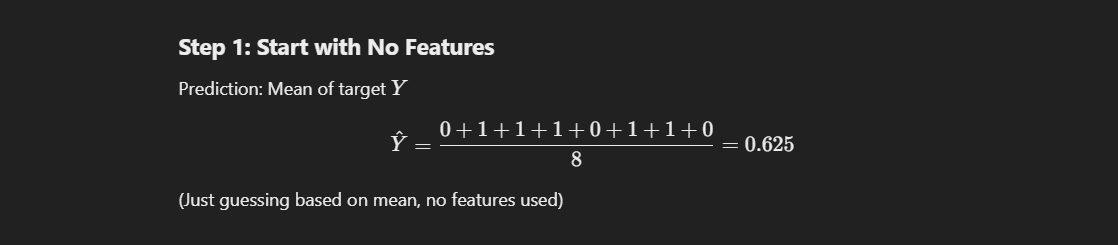

In [41]:
Image("image_2.png")

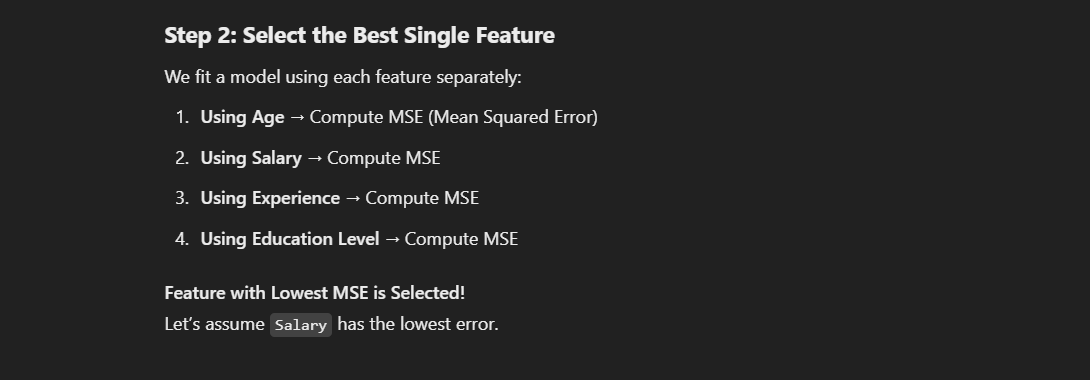

In [42]:
Image("image_3.png")

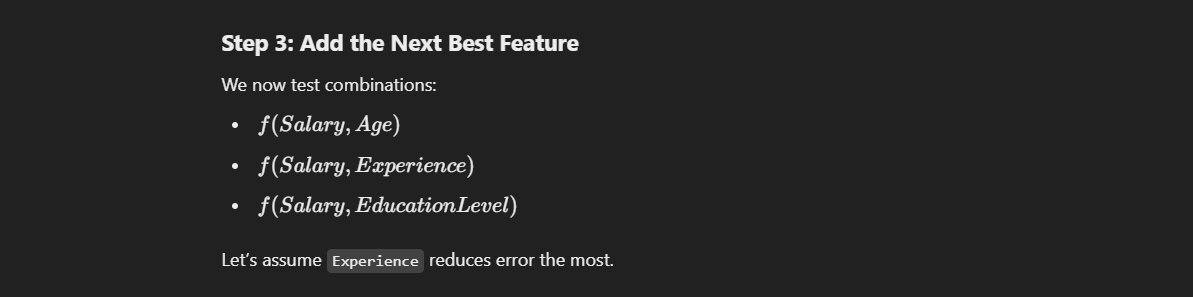

In [43]:
Image("image_4.png")

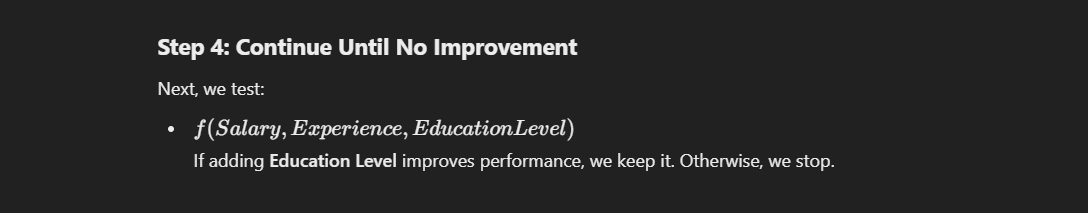

In [44]:
Image("image_5.png")

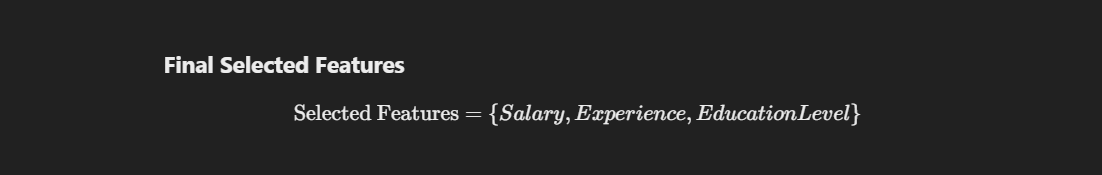

In [45]:
Image("image_6.png")

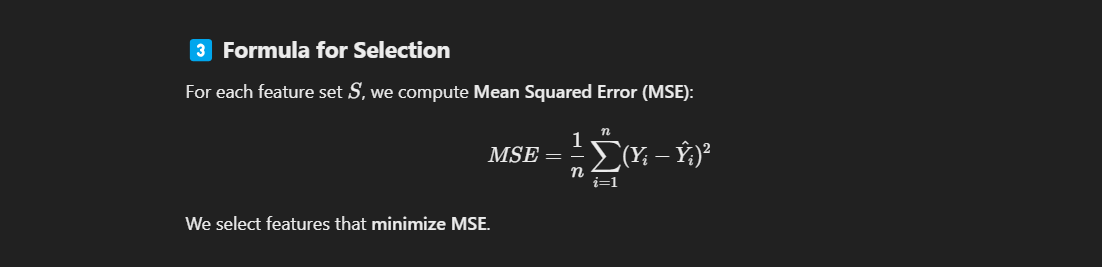

In [46]:
Image("image_7.png")

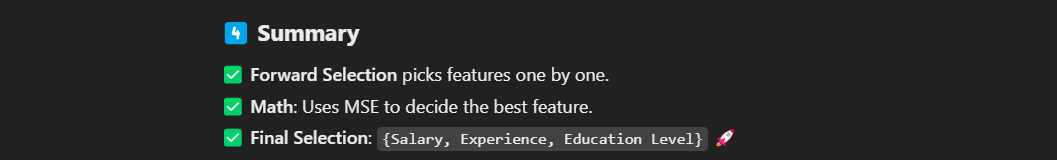

In [47]:
Image("image_8.png")

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# 📌 Sample Data (Same as Above Example)
data = {
    "Age": [25, 30, 35, 40, 22, 50, 45, 28, 33, 38, 55, 60, 27, 42, 48, 53, 32, 37, 26, 29],
    "Salary": [50000, 60000, 75000, 80000, 45000, 90000, 85000, 55000, 70000, 78000, 95000, 110000, 52000, 87000, 91000, 108000, 66000, 77000, 49000, 58000],
    "Experience": [2, 5, 7, 10, 1, 15, 12, 3, 6, 8, 17, 20, 4, 11, 14, 18, 5, 9, 2, 4],
    "Education Level": [1, 2, 2, 3, 1, 3, 3, 1, 2, 3, 3, 4, 1, 3, 3, 4, 2, 3, 1, 1],
    "Loan Approved": [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],  # Target Variable
}

df = pd.DataFrame(data)

In [50]:
X = df.drop(columns=["Loan Approved"], axis=1)
Y = df["Loan Approved"]

X.shape, Y.shape

((8, 4), (8,))

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5, 4), (3, 4), (5,), (3,))

In [53]:
log_reg = LogisticRegression()

log_model1 = log_reg.fit(x_train, y_train)

log_model1.score(x_test, y_test)

0.6666666666666666

In [54]:
# 📌 Forward Feature Selection using Logistic Regression
model = LogisticRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", cv=5)
sfs.fit(x_train, y_train)


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
selected_features =  X.columns[sfs.get_support()]
print("✅ Selected Features:", list(selected_features))


AttributeError: 'SequentialFeatureSelector' object has no attribute 'support_'

In [ ]:
# 📌 Train Model with Selected Features
X_train_selected = sfs.transform(x_train)
X_test_selected = sfs.transform(x_test)

AttributeError: 'SequentialFeatureSelector' object has no attribute 'support_'

In [ ]:
model.fit(X_train_selected, y_train)
accuracy = model.score(X_test_selected, y_test)

print("📊 Model Accuracy with Selected Features:", accuracy)